In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

C:\Users\Petro\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Petro\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\Petro\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Petro\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [3]:
os.getcwd()

'C:\\Users\\Petro\\Desktop\\Visual Analytics\\Visual_Analytics'

In [4]:
data = pd.read_csv('review.csv')

In [5]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,latitude,longitude
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,35.888455,-119.273781
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,37.770971,-119.941025
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,35.684863,-119.709299
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,37.061159,-119.279135
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,36.790587,-120.867752


In [5]:
data.shape

(14640, 12)

In [6]:
data.isnull().any()

tweet_id                        False
airline_sentiment               False
airline_sentiment_confidence    False
negativereason                   True
negativereason_confidence        True
airline                         False
name                            False
retweet_count                   False
text                            False
tweet_created                   False
latitude                        False
longitude                       False
dtype: bool

In [7]:
data['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

Text(0.5, 1.0, 'Virgin America')

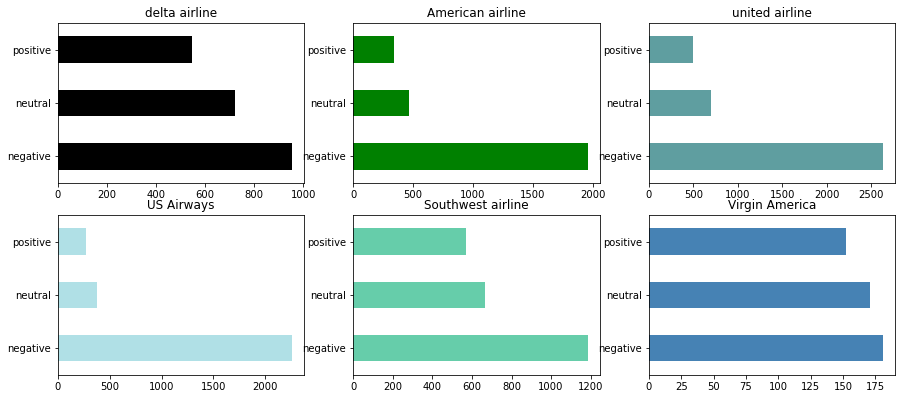

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(331)
data[data['airline']=='Delta']['airline_sentiment'].value_counts().plot(kind='barh',color='black')
plt.title('delta airline')
plt.subplot(332)
data[data['airline']=='American']['airline_sentiment'].value_counts().plot(kind='barh',color='green')
plt.title('American airline')
plt.subplot(333)
data[data['airline']=='United']['airline_sentiment'].value_counts().plot(kind='barh',color='cadetblue')
plt.title('united airline')
plt.subplot(334)
data[data['airline']=='US Airways']['airline_sentiment'].value_counts().plot(kind='barh',color='powderblue')
plt.title('US Airways')
plt.subplot(335)
data[data['airline']=='Southwest']['airline_sentiment'].value_counts().plot(kind='barh',color='mediumaquamarine')
plt.title('Southwest airline')
plt.subplot(336)
data[data['airline']=='Virgin America']['airline_sentiment'].value_counts().plot(kind='barh',color='steelblue')
plt.title('Virgin America')

In [8]:
# !pip install geopandas

     ---------------------------------------- 1.0/1.0 MB 8.2 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [1 lines of output]
  A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
You should consider upgrading via the 'C:\Users\Petro\anaconda3\python.exe -m pip install --upgrade pip' command.


In [10]:
import geopandas as gpd
from shapely.geometry import Point,Polygon

In [11]:
# to convert data into points
geo=[Point(xy) for xy in  zip(data[data['airline']=='Delta']['longitude'][:200],data[data['airline']=='Delta']['latitude'][:200])]
geo1=[Point(xy) for xy in  zip(data[data['airline']=='Southwest']['longitude'][:200],data[data['airline']=='Southwest']['latitude'][:200])]
geo2=[Point(xy) for xy in  zip(data[data['airline']=='American']['longitude'][:200],data[data['airline']=='American']['latitude'][:200])]
geo3=[Point(xy) for xy in  zip(data[data['airline']=='United']['longitude'][:200],data[data['airline']=='United']['latitude'][:200])]
geo4=[Point(xy) for xy in  zip(data[data['airline']=='US Airways']['longitude'][:200],data[data['airline']=='US Airways']['latitude'][:200])]
geo5=[Point(xy) for xy in  zip(data[data['airline']=='Virgin America']['longitude'][:200],data[data['airline']=='Virgin America']['latitude'][:200])]

In [12]:
# gpd is similiar to pd
g=gpd.GeoDataFrame(geometry=geo)
g1=gpd.GeoDataFrame(geometry=geo1)
g2=gpd.GeoDataFrame(geometry=geo2)
g3=gpd.GeoDataFrame(geometry=geo3)
g4=gpd.GeoDataFrame(geometry=geo4)
g5=gpd.GeoDataFrame(geometry=geo5)
US = gpd.read_file('States_shapefile-shp/States_shapefile.shp')

In [13]:
type(US)

geopandas.geodataframe.GeoDataFrame

In [14]:
type(data)

pandas.core.frame.DataFrame

In [15]:
US.head()

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
1,2,None,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
3,4,PDS,AR,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
4,5,None,CA,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."


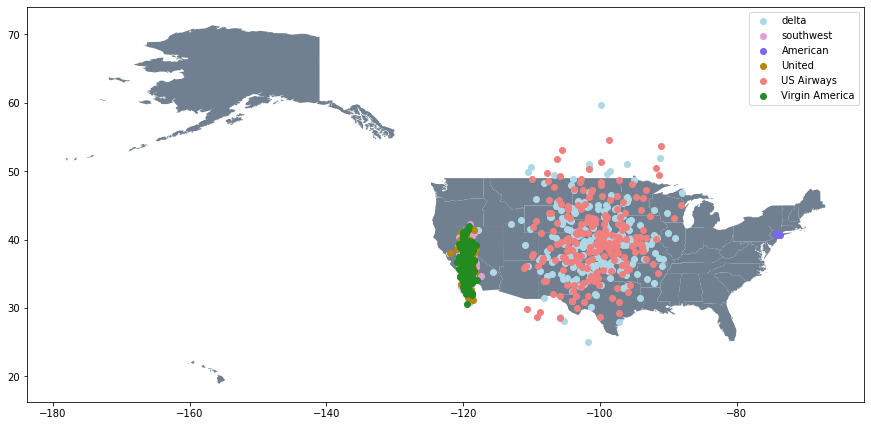

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
#US.boundary.plot(ax=ax,color='slategrey')
US.plot(ax=ax,color='slategrey')
g.plot(ax=ax,color='lightblue',label='delta')
g1.plot(ax=ax,color='plum',label='southwest')
g2.plot(ax=ax,color='mediumslateblue',label='American')
g3.plot(ax=ax,color='darkgoldenrod',label='United')
g4.plot(ax=ax,color='lightcoral',label='US Airways')
g5.plot(ax=ax,color='forestgreen',label='Virgin America')
plt.legend()

In [17]:
import pickle

file = open('Flights_review.pkl','wb')

pickle.dump(data,file)